In [1]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Physics of Nuclear Energy Problems 
by *Nora Salone* 

### Problem 4.1

Absorption of neutrons in the fuel, $^{235}U+ ^{238}U$, leads in some cases to fission which gives new fast
neutrons.
Derive the formula for $\eta$, the effective number of fission neutrons per one neutron absorbed in fuel

$$\eta = \nu_{235}\frac{e\sigma_{f235}}{e(\sigma_f+\sigma_c)_{235}+(1-e)\sigma_{a238}},\qquad e=\frac{N_{235}}{N_{235}+N_{238}}
$$

in terms of the enrichment $e$.

$$\eta = \frac{\text{# fast n by fission}}{\text{# thermal n absorbed in fuel}} = \nu P_f$$

where $\nu=\nu_{235}$ is the average number of produced neutrons by $^{235} U$ fission, $P_f$ is the fission probability, defined in term of fission and absorption (and capture) macroscopic cross-sections as

$$P_f = \frac{\Sigma_f}{\Sigma_a} = \frac{\Sigma_f}{\Sigma_f +\Sigma_c}$$

Using cross-sections for thermal neutrons, this makes $\eta$

$$\nu_{235} \frac{\Sigma_f}{\Sigma_f +\Sigma_c}=\nu_{235}\frac{N_{235}\sigma_{f235}}{N_{235}(\sigma_f+\sigma_c)_{235}+N_{238}\sigma_{c238}}\frac{N_{235}+N_{238}}{N_{235}+N_{238}} = \nu_{235}\frac{\sigma_{f235}}{\frac{N_{235}(\sigma_f+\sigma_c)_{235}+N_{238}\sigma_{c238}}{N_{235}+N_{238}}}\frac{N_{235}}{N_{235}+N_{238}}=\\
=\nu_{235}\frac{e\sigma_{f235}}{e(\sigma_f+\sigma_c)_{235}+(1-e)\sigma_{a238}}$$

by using the abovementioned definition of enrichment. Note how in case of fresh $U$ fuel we are assuming as fissile only $^{235}U$, meaning that $\sigma_{a238}=\sigma_{c238}$.

a. Study how the fission factor depends on the enrichment and determine the value at an
enrichment of 0.7, 1.0, 2.0 and 3 %.

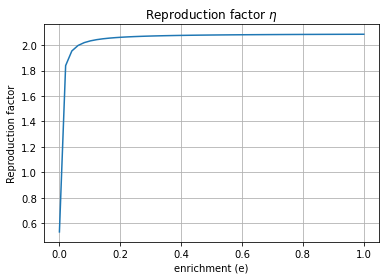

In [2]:
# Data for plotting
e = np.linspace(0.001, 1.0, 50, endpoint=True)
sigma_f235 = 583.0 #barn
sigma_c235 = 99.0 #barn
sigma_c238 = 2.0 #barn
nu = 2.44 #for uranium

eta = nu*e*sigma_f235/(e*(sigma_f235+sigma_c235)+(1-e)*sigma_c238)
fig, ax = plt.subplots()
ax.plot(e, eta)

ax.set(xlabel='enrichment (e)', ylabel='Reproduction factor',
       title='Reproduction factor $\eta$')
ax.grid()

plt.show()

In [3]:
data=np.divide([0.7,1.0,2.0,3.0],100) # e are precentages, in the formula 1-e
results=[]

def eta_f(e):
    return nu*e*sigma_f235/(e*(sigma_f235+sigma_c235)+(1-e)*sigma_c238)

for i in range(len(data)):
    results.append([data[i],eta_f(data[i])])

print(results)

[[0.006999999999999999, 1.4730236686390534], [0.01, 1.6165], [0.02, 1.8237435897435896], [0.03, 1.9051607142857143]]


In [4]:
Dane=np.array([["",'1.3304','1.4938','1.7438','1.8468']])
 
Dane_display= pd.DataFrame(Dane,columns=['e[%] =','0.7', '1.0','2.0','3.0'],index=['$\eta$'])
display(Dane_display)

,e[%] =,0.7,1.0,2.0,3.0
$\eta$,,1.3304,1.4938,1.7438,1.8468


b. Calculate the value of the fission factor for highly enriched uranium and plutonium fissioned by thermal and fast neutrons (2 MeV).

For the fission factor for thermal neutrons, we can use the same formula above for the highly enriched uranium, i.e. $e \sim 20\%$; for the respective fast fission factor $\epsilon$, we just replace the thermal microscopic cross-sections with fast neutron cross-sections for uranium. Since the fast fission microscopic cross setion is not 0 for $^{238}U$, we also add the respective term, following in a similar fashion from the definition of $\eta$:

$$\epsilon = \nu_{235}\frac{N_{235}\sigma_{f235}+N_{238}\sigma_{f238}}{N_{235}(\sigma_f + \sigma_c)_{235}+N_{238}(\sigma_f + \sigma_c)_{238}} =  \nu_{235}\frac{e\sigma_{f235}+(1-e)\sigma_{f238}}{e(\sigma_f + \sigma_c)_{235}+(1-e)(\sigma_f + \sigma_c)_{238}}$$

In [5]:
nu = 2.44 #for uranium
e=0.2 #highly enriched uranium, around 20%
results=[]

def eta_f(e): #thermal eta
    return nu*e*sigma_f235/(e*(sigma_f235+sigma_c235)+(1-e)*sigma_c238)

def epsilon_f(e): #fast epsilon
    return nu*(e*sigma_f235+(1-e)*sigma_f238)/(e*(sigma_f235+sigma_c235)+(1-e)*(sigma_c238+sigma_f238))

#thermal neutrons in barn
sigma_f235 = 583.0  #238-U has sigma_f = 0.0 below 0.1 MeV
sigma_c235 = 99.0 
sigma_c238 = 2.0
results.append(eta_f(e))
#check
print("This matches the expected results since for e = 1, eta =",eta_f(1), "for 100% 235-U fissioned by thermal neutrons.")

#fast neutrons in barn
sigma_f235 = 1.0
sigma_f238 = 0.3 
sigma_c235 = 0.09 
sigma_c238 = 0.07 
results.append(epsilon_f(e))
print("This matches the expected results since for e = 1, epsilon =",epsilon_f(1), "for 100% 235-U fissioned by fast neutrons.")

print("thermal,","fast")
print(results)


This matches the expected results since for e = 1, eta = 2.0858064516129033 for 100% 235-U fissioned by thermal neutrons.
This matches the expected results since for e = 1, epsilon = 2.238532110091743 for 100% 235-U fissioned by fast neutrons.
thermal, fast
[2.061623188405797, 2.0887159533073927]


We calculate from scratch $\eta$ for plutonium, then we replace the thermal cross sections with fast neutron cross sections to obtain $\epsilon$:

$$\eta = \nu_{239}\frac{\Sigma_{f239}}{\Sigma_{a239}}= \nu_{239}\frac{N_{239}\sigma_{f239}}{N_{239}(\sigma_f+\sigma_c)_{239}}=\nu_{239}\frac{\sigma_{f239}}{(\sigma_f+\sigma_c)_{239}}$$

In [6]:
nu = 2.90 #for uranium
results=[]

def eta_fp():
    return nu*sigma_f239/(sigma_f239+sigma_c239)

#thermal neutrons
sigma_f239 = 748.0 #barn
sigma_c239 = 269.0 #barn
results.append(eta_fp())
#check
print("This matches the expected results since eta =",eta_fp(), "for 100% 239-Pu fissioned by thermal neutrons.")

#fast neutrons
sigma_f239 = 2.0 #barn
sigma_c239 = 0.05 #barn
results.append(eta_fp())
print("This matches the expected results since epsilon =",eta_fp(), "for 100% 239-Pu fissioned by fast neutrons.")

print("thermal,","fast")
print(results)

This matches the expected results since eta = 2.1329400196656834 for 100% 239-Pu fissioned by thermal neutrons.
This matches the expected results since epsilon = 2.829268292682927 for 100% 239-Pu fissioned by fast neutrons.
thermal, fast
[2.1329400196656834, 2.829268292682927]


In [7]:
Dane=np.array([["",'2.0616','2.1329'],["",'2.0887','2.8293']])
 
Dane_display= pd.DataFrame(Dane,columns=['','$^{235}U$','$^{239}Pu$'],index=['$\eta$','$\epsilon$'])
display(Dane_display)

,,$^{235}U$,$^{239}Pu$
$\eta$,,2.0616,2.1329
$\epsilon$,,2.0887,2.8293


### Problem 4.2
Stainless steel, type 304 having a density of $7.86$ $\text{g}/\text{cm}^3$, has been used in some reactors. The nominal composition by weight of this material is as follows: carbon, 0.08%; chromium, 19%; nickel, 10%; iron, the remainder. Calculate the macroscopic absorption cross-section of SS-304 at 0.0253 eV, given

* Density, $\rho = 7.86$ $\text{g}/\text{cm}^3$;
* Weight fraction of carbon, $w_C$ = 0.08 %;
* Weight fraction of chromium, $w_{Cr}$ = 19 %;
* Weight fraction of nickel, $w_{Ni}$ = 10 %;
* Weight fraction of iron, $w_{Fe}$ = 100% - $w_C$ - $w_{Cr}$ - $w_{Ni}$.

The macroscopic absorption cross-section of SS-304 is defined in terms of the microscopic absorption cross-sections $\sigma_{a,i}$ and the atomic number densities $N_i$ of the different components as

$$\Sigma_a = \sum_i \sigma_{a,i} N_i = \sum_i \sigma_{a,i} \rho_i\frac{N_A}{M_i} = \sum_i \sigma_{a,i} \rho w_i\frac{N_A}{M_i}$$

where $w_i$ are the nominal compositions by weight of SS-304 and are thus expressed as fraction of SS-304 density $\rho$.

In [8]:
N_A = 6.02214076*10**(23) #Avogadro's number, mol^{-1}
rho = 7.86 # g/cm^3 SS-304 mass density 

def N(w,M):
    return rho*w*N_A/M # atomic number density, cm^{-3}

atom_dens=[]
w=np.divide([0.08,19.0,10.0,100.0-(0.08+19.0+10.0)],100.0) # to calculate weights in percentage of [C, Cr, Ni, Fe]
M=[12.01115,51.996,58.71,55.847] # molar masses of [C, Cr, Ni, Fe], g/mol

for i in range(len(w)):
    atom_dens.append(N(w[i],M[i]))
    
def Sigma(sigma,N):
    return sigma*N # macroscopic (absorption) cross-section

mac_xs = []
mic_xs = np.multiply([0.0034, 3.1, 4.43, 2.55],pow(10,-24)) # microscopic xs at E = 0.0253 eV, in cm^2 (barn = 10^{-24} cm^2)

for i in range(len(mic_xs)):
    mac_xs.append(Sigma(mic_xs[i],atom_dens[i]))

Sigma_t=np.sum(mac_xs) # in cm^{-1} 
print("The total absorption macroscopic cross-section is",Sigma_t,"cm^{-1}.") #total absorption macroscopic xs

The total absorption macroscopic cross-section is 0.24261521816728635 cm^{-1}.


In [9]:
Dane=np.array([["",'$3.153 \times 10^{20}$','$1.730 \times 10^{22}$','$8.062 \times 10^{21}$','$6.011 \times 10^{22}$',''],["",'$1.072 \times 10^{-6}$','$0.054$','$0.036$','$0.153$',''],['','','','','','$0.243$']])
 
Dane_display= pd.DataFrame(Dane,columns=['element','$C$','$Cr$', '$Ni$', '$Fe$','SS-304'],index=['$N_i$ $(cm^{-3})$','$\Sigma_i$ $(cm^{-1})$','$\Sigma_a$ $(cm^{-1})$'])
display(Dane_display)

,element,$C$,$Cr$,$Ni$,$Fe$,SS-304
$N_i$ $(cm^{-3})$,,$3.153 \times 10^{20}$,$1.730 \times 10^{22}$,$8.062 \times 10^{21}$,$6.011 \times 10^{22}$,
$\Sigma_i$ $(cm^{-1})$,,$1.072 \times 10^{-6}$,$0.054$,$0.036$,$0.153$,
$\Sigma_a$ $(cm^{-1})$,,,,,,$0.243$


### Problem 4.3
The fuel for a certain breeder reactor consists of pellets composed of mixed oxides, $UO_2$ and $PuO_2$, with the $PuO_2$ comprising approximately 30 w/o of the mixture. The uranium is essentially all $^{238}U$, whereas the plutonium contains the following isotopes: $^{239}Pu$ (70.5 w/o), $^{240}Pu$ (21.3 w/o), $^{241}Pu$ (5.5 w/o), and $^{242}Pu$ (2.7 w/o). The pellet density is about 10.6 $g/cm^3$.
Calculate $\Sigma_a$ and $\Sigma_f$ (at 0.0253 eV) for these fuel pellets.

Given
* Fuel = $UO_2$ + $PuO_2$
    * Plutonium dioxide weight fraction, $w_{PuO_2}$ = 30 w/o;
    * Uranium dioxide weight fraction, $w_{UO_2}$ = 70 w/o;
* Fuel density, $\rho$ = 10.6 $g/cm^3$;
* U = $^{238}U$;
* Plutonium composition:
    * $^{239}Pu$ weight fraction in the plutonium, $w_{^{239}Pu}$ = 70.5 w/o;
    * $^{240}Pu$ weight fraction in the plutonium, $w_{^{240}Pu}$ = 21.3 w/o;
    * $^{241}Pu$ weight fraction in the plutonium, $w_{^{241}Pu}$ = 5.5 w/o;
    * $^{242}Pu$ weight fraction in the plutonium, $w_{^{242}Pu}$ = 2.7 w/o.

The plutonium oxide makes up for 30 w/o of the mixture, i.e. 30% of the mixture density. The molar mass of a molecule is the sum of the molar masses of the component elements weighted by the number of atoms for each element, e.g.

$$M_{UO_2} = \big[M(U) + 2M(O)\big] \quad \text{g/mol}$$

The plutonium molar mass requires a bit more attention, since it is a mixture, for which the total molar mass is the weighted sum of the isotopes masses, i.e.

$$M_{Pu} = \sum_i w_i M_i$$

The total absorption (or fission) macroscopic cross-section of the fuel is calculated with the same formula used in 4.2, keeping in mind the composition of the fuel itself, as in

$$ \Sigma_a = \Sigma_{a,PUO_2} + \Sigma_{a,UO_2} = \rho \cdot N_A\bigg[\frac{0.3}{M_{PuO_2}}\sigma_{a,PuO_2} + \frac{0.7}{M_{UO_2}}\sigma_{a,UO_2} \bigg]$$

Note how the microscopic cross-sections were computed as cross-sections of molecules, e.g.

$$ \sigma(UO_2) = \sigma(U) + 2\cdot\sigma(O)$$

and for the plutonium as cross-section of mixtures, e.g.

$$ \sigma(Pu) = \sum_i \sigma_i \frac{N_i}{N} = \sum_i \sigma_i w_i$$

In [10]:
w = np.divide([70.5,21.3,5.5,2.7],100.0) # weights of different Pu isotopes [Pu239, Pu240, Pu241, Pu242]
M = [239.0521636,240.0538138,241.0568517,242.0587428] # molar masses of different Pu isotopes, g/mol, [Pu239, Pu240, Pu241, Pu242]
M_O = 15.9994  # oxygen molar mass, g/mol
M_u = 238.0507884 # uranium molar mass, g/mol

# useful microscopic xs in barn, a = absorption, f = fission
sigma_a = [1020.0, 289.5, 1378.0, 10.3] # [Pu239, Pu240, Pu241, Pu242]
sigma_f = [749.0, 0.064, 1015.0, 0.0]
sigmaao = 0.00027
sigmaau = 2.73
sigmafo = 0.0
sigmafu = 0.0

#plutonium weighted quantities
M_pu = 0.0
sigma_atot = 0.0
sigma_ftot = 0.0
for i in range(len(w)):
    M_pu += w[i]*M[i]
    sigma_atot += w[i]*sigma_a[i] 
    sigma_ftot += w[i]*sigma_f[i]
    #print(M_pu, sigma_atot, sigma_ftot)

M_puo = M_pu + 2*M_O
M_uo = M_u + 2*M_O
rho = 10.6 # total fuel density, g/cm^3

Sigma_atot = rho*N_A*(0.7/M_uo*(sigmaau + 2*sigmaao) + 0.3/M_puo*(sigma_atot + 2*sigmaao))*10**(-24) # convert barn into cm^{2}
Sigma_ftot = rho*N_A*(0.7/M_uo*(sigmafu + 2*sigmafo) + 0.3/M_puo*(sigma_ftot + 2*sigmafo))*10**(-24)

print("The total absorption macroscopic cross section is", Sigma_atot, "cm^{-1}.")
print("The total fission macroscopic cross section is",Sigma_ftot, 'cm^{-1}.')

The total absorption macroscopic cross section is 6.089881041411777 cm^{-1}.
The total fission macroscopic cross section is 4.119127898315241 cm^{-1}.


### Problem 4.4
Measurements on an experimental thermal reactor show that, for every 100 neutrons emitted in fission, 10 escape while slowing down and 15 escape after having slowed down to thermal energies. No neutrons are absorbed within the reactor while slowing 
down. Of those neutrons absorbed at thermal energies, 60% are absorbed in fission material. 
* a. What is the multiplication factor of the reactor at the time these observations are made?
* b. Suppose the thermal leakage is reduced by one third. How would this change the value of $k$?

Note: The values of $\eta$ and $\nu$ for the reactor fuel are 2.07 and 2.42, respectively.

Given:
* Normalised number of neutrons in one generation, $N_0$ = 100;
* Number (per 100) of fast neutrons leaking the system while slowing down, NFL = 10;
* Number (per 100) of thermal neutrons leaking the system, NTL = 15;
* Resonance escape probability, p = 1 ($0$ neutrons are absorbed while slowing down);
* Thermal utilisation factor, f = 0.6;
* Reproduction factor, $\eta$ = 2.07;
* Number fission neutrons, , $\nu$ = 2.42;
* Thermal neutron leakage reduction fraction, r = 1/3.

* a. The multiplication factor is calculated as the ratio of the number of neutrons produced in one generation to the number of neutrons of the previous generation (in case of the first cycle, to the initial number of neutrons $N_0$). It can be computed directly throught the specifics of the reactor using

$$k = \epsilon \cdot P_f \cdot P_t \cdot p \cdot f \cdot \eta$$

where $\epsilon$ is the fast fission factor, $P_f$ is the probability of non-fast leakage (likelihood of fast neutrons to not leak out of the reactor), $P_t$ is the probability of non-thermal leakage (same with thermal neutrons), $p$ is the probability of the neutrons to escape resonance capture while slowing down, $f$ is the ratio of neutrons effectively absorbed by the fuel to the total number of absorbed neutrons and $\eta$ is the ratio of fast neutrons produced by fission to the total number of fuel-absorbed netrons. We assume $\epsilon = 1$, i.e. no neutrons of the first generation undergo fast fission.

In [11]:
N_0 = 100 # initial number of neutrons
NFL = 10 # fast neutrons leaked
NTL = 15 # thermal neutrons leaked
epsilon = 1
P_f = (N_0-NFL)/N_0
P_t = (N_0-NFL-NTL)/(N_0-NFL)
p = 1
f = 0.6
eta = 2.07
k = epsilon*P_f*P_t*p*f*eta # multiplication factor
ratio = ((N_0-NFL-NTL)*0.6*2.07)/N_0
print("The muliplication factor k =",k,".")

#check with ratio of final to initial neutron numbers
print("The ratio of final to initial neutrons is",ratio,".")
if k == ratio:
    print("---> This matches the predicton for k.")

NTL = NTL*2/3 # fewer thermal neutrons leak: number reduced by 1/3
P_t = (N_0-NFL-NTL)/(N_0-NFL)
print("If thermal neutrons leakage is reduced by 1/3, k =",epsilon*P_f*P_t*p*f*eta, ".")

The muliplication factor k = 0.9314999999999999 .
The ratio of final to initial neutrons is 0.9314999999999999 .
---> This matches the predicton for k.
If thermal neutrons leakage is reduced by 1/3, k = 0.9935999999999998 .


The value of the multiplication factor $k$ is 

$$k = 0.9315$$

and it matches to the ratio of number of initial neutrons to number of final neutrons.

* b. If the thermal leakage is reduced by 1/3, we only need to replace $NTL$ with $NTL\frac{2}{3}$, since reduced thermal leakage means fewer thermal neutrons leak. Since $P_t$ (the likelihood to avoid thermal leakage) increases and overall $k$ also increases, we get

$$k = 0.9936$$

### Problem 4.5
Calculate the prompt neutron lifetime in an infinite, critical thermal reactor at 100 ºC consisting of a homogeneous mixture of $^{235}U$ and the commercial heavy water. Take the resonance escape probability in such a reactor as 0.87, and the fast fission factor as 1.02 and assume that the commercial heavy water is 1/v absorber.

For an infinite, critical reactor the multiplication factor is $k_\infty = 1$. The homogeneous mixture in the reactor is $^{235}U + D_2 O$ where $F= ^{235}U$ is the fuel and $M = D_2 O$ is the moderator. For a thermal reactor, one can assume that between the slowing down time $t_s$ and the diffusion time $t_d$ it holds that

$$t_s << t_d \qquad \Longrightarrow \qquad l_p = t_s + t_d \approx t_d $$

where $l_p$ is the prompt neutron lifetime. Furthermore, the diffusion time is defined as

$$t_d = \frac{\lambda_a}{v} = \frac{1}{\Sigma_a v}$$

with mean free path $\lambda_a$ and absorption macroscopic cross-section $\Sigma_a$. We express the latter using the thermal neutron utilization factor

$$ f = \frac{\Sigma_a^F}{\Sigma_a} = \frac{\Sigma_a^F}{\Sigma_a^F + \Sigma_a^M} \qquad \Longrightarrow \qquad \Sigma_a = \frac{\Sigma_a^M}{1-f}$$

Gathering everything together, the prompt neutron lifetime becomes

$$l_p = \frac{1}{\Sigma_a v} = \frac{1-f}{\Sigma_a^M v} = \frac{1-f}{\Sigma_{a,0}^M v_0}$$

In a 1/v absorbing medium, we use macroscopic cross-sections $\Sigma_{a,0}^M$, which are tabulated for the most probable velocity $v_0=2200$ $m/s$ (for a thermal reactor at 100 °C. We compute the macroscopic cross-sections as in problem 4.2 in terms of mass density, molar mass and Avogadro number.

In [12]:
w = 1 # we have the density of the whole component, we don't need weights here

#uranium
rho = 19.1 # uranium mass density g/cm^3
M = 235.04 # uranium-235 molar mass g/mol
atom_dens=N(w,M) # cm^{-3}

#thermal neutrons
sigma_f235 = 583.0 #barn
sigma_c235 = 99.0 #barn
sigma = (sigma_f235 + sigma_c235)*10**(-24) # absorption microscopic xs for fuel = uranium-235 in cm^{2}
Sigma_F=Sigma(sigma,atom_dens) # F = fuel, cm^{-1}

#heavy water
rho = 1.11 # heavy water mass density g/cm^3
M = (2*2.01410177811 + 15.99903) # heavy water molar mass g/mol
atom_dens= N(w,M) # cm^{-3}

#thermal neutrons
sigma_aD = 3*10**(-4) #barn
sigma_aO = 1*10**(-4) #barn
sigma = (2*sigma_aD + sigma_aO)*10**(-24) # absorption microscopic xs for moderator = heavy water in cm^{2}
Sigma_M=Sigma(sigma,atom_dens) # M = moderator, cm^{-1}

f = Sigma_F/(Sigma_F+Sigma_M) # thermal utilization factor

v_0 = 2200*10**2 #most probable velocity, cm/s
l_p = (1-f)/(Sigma_M*v_0) # prompt neutron lifetime

print("The prompt neutron lifetime is",l_p,"s.")

The prompt neutron lifetime is 1.361915458065172e-07 s.


### Problem 4.6

Express the following reactivities of a $^{233}U$-fueled thermal reactor in dollars:
* a) 0.001
* b) 4%
* c) −0.01

To express reactivity in $\$$, we take the reactivity $\rho = \frac{k-1}{k}$ and we divide it by the delayed neutrons fraction $\beta$, which for $^{233}U$ is $\beta =0.00281$.

In [13]:
reactivity=[0.001,0.04,-0.01]
beta = 0.0026 # found it on slide 52 lec 5
results=[]

def dollars(rho):
    return rho/beta

for i in range(len(reactivity)):
    results.append(dollars(reactivity[i]))
    
print(results)

Dane=np.array([['0.001','0.35587'],['0.04','14.235'],['-0.01','-3.5587']])
 
Dane_display= pd.DataFrame(Dane,columns=['reactivity $\rho$','reactivity $\$$'],index=['a)','b)','c)'])
display(Dane_display)

[0.38461538461538464, 15.384615384615385, -3.8461538461538463]


,reactivity $\rho$,reactivity $\$$
a),0.001,0.35587
b),0.04,14.235
c),-0.01,-3.5587


### Problem 4.7

A $^{235}U$-fueled reactor originally operating at a constant power of 15 milliwatt is placed on a positive 10-minute period. At what time will the reactor power level reach 0.9 megawatt?

The reactor period is defined as the time required for the neutron density to change by a factor $e$. The neutron density law is

$$n(t) = n_0 \exp\bigg(\frac{k-1}{l}t\bigg)=\exp\bigg(\frac{t}{T}\bigg)$$

We can relate the power of a reactor to the neutron density following

$$ \frac{n(t)}{n_0} = \frac{P}{P_0} = \exp\bigg(\frac{t}{T}\bigg)$$

In [14]:
T = 10 # positive reactor period, min
P = 0.9*10**6 # final reactor power, watt
P_0 = 15*10**(-3) # initial reactor power, watt
t = T*np.log(P/P_0)

print("The time at which the reactor power level will reach 0.9 Mw is",t, "min.")

The time at which the reactor power level will reach 0.9 Mw is 179.09855120186376 min.


### Problem 4.8

One cent of either positive or negative reactivity places a $^{235}U$-fueled reactor on what period?

The reactor period is linked to the reactivity $\rho$ through

$$T = \frac{l}{k-1} = \frac{l}{\rho} $$

where we assumed an infinite reactor for which $\rho \approx \delta k = k - 1$ and with the average neutron lifetime $l$ for $^{235}U$

$$l = (1-\beta)l_p + \beta(\bar{\tau}+l_p) \approx \beta \bar{\tau} = 0.08 \text{ s}$$

since $\beta \bar{\tau}>>l_p$. We do the additional step to convert $\rho$ from $\$$ values using $\beta$.

In [15]:
beta = 0.0067 # delayed neutron fraction for 235-U
dollar = 0.01 # 1 cent of $
l = 0.08 # s

rho = dollar*beta
#check
print("This is a normal reactor operation since rho < beta:", rho, "<", beta, ".")

T = l/rho

print("The reactor period is", T, 's, or', T/60.0, "min.")

This is a normal reactor operation since rho < beta: 6.7e-05 < 0.0067 .
The reactor period is 1194.0298507462687 s, or 19.900497512437813 min.


### Problem 6.1

Identify and explain the differences between fission and fusion energy. Can fission and fusion work together? Why fusion may need fission?


To discuss this matter, let us start from defining these two opposing nuclear reactions:
	-fission: process through which one nuclide (atom) splits in two lighter, smaller nuclides (atoms)
	-fusion: process of merging two smaller nuclides (atoms) into a heavier one
When induced with the aim of producing energy, both these processes show a consequent release of energy, related to the binding energy (BE) of the fissioning or fusioning nucleus.
Producing energy is synonym of exothermic process, which happens when the latter is energetically favorable, i.e. the BE of the fusioning nucleus is higher than the initial state components' combined.
For fission, one can also express the process through BE, though in that case the BE of the final state components has to be higher than the fissioning nucleus to achieve an energy release.

In both cases, the energy release calculations stem from Einstein formula on mass-energy relation, i.e. the mass deficit between initial and final state.
The energy is distributed among the fusion products based on their mass (the lower the mass, the higher the kinetic energy).

Fission and fusion can work together in the sense that in the recent years studies have been focusing on trying to generate nuclear power through a combination of fission and fusion.
Starting from a fusion reactor, the produced fast neutrons would be used to trigger fission in non-fissile (i.e. fissionable only once) fuels. The advantages of this would be employing as 
fissionable material nuclear waste. Typically, the latter is produced in fission reactors, where when the fuel gets to the end of its fission chain is not useful to mantain the criticality of the reactor itself.
In fusion-fission hybrid mechanism, the waste would be the target of the fusion-produced fast neutrons. 
A key concept in the hybrid mechanism is fission multiplication: every fusion activates a rather large amount of fission events, more than 11 times the energy output of the original fusion.
The main disadvantage for this is the factual realisation of such a reactor: to balance costs and benefits, the overall reactor requires to be of large dimensions; this adds to the neutron economy issue,
where the output of the reactor is largely reduced. In fact, part of the fusion-produced neutrons must be used as trigger for additional fusion processes, rather than fission, as they were designed to do, in order to 
provide self-sustained, continued fusion.

Fusion may need fission when providing for the initial state of a fusion process. For instance, the most commonly used fusion process is

$$ D + T \to n + ^{4}He$$

The main issue is the scarce availability of natural tritium, which requires its artificial production, e.g. from Lithium fission:

$$ Li + n \to ^{4}He + T$$ 

However, this is actually quite difficult to realise in typical fusion reactors: in order to employ a fusion-produced neutron to trigger a fission reaction on Lithium, 
one would need to utilise neutron with 100% accuracy, which is impossible to achieve.


Note: I have skipped sheet 5 and the remaining exercises of sheet 6 since I found them less interesting to solve.